In [163]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plot
%matplotlib inline

In [164]:
#Help check accuracy of predictions to actual data
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [165]:
data = pd.read_csv("../../data-challenges/BuildingInspections/data/Building_Violations_50000_features_and_labels.csv")
del data['Unnamed: 0']
del data['unnamed:_0']

In [166]:
#Converting violation date from object to DateTime
data.violation_date=pd.to_datetime(data.violation_date)
data.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,plumbing,refrigeration,signs,special_inspection_program,special_task_force,ventilation,water,complied,no_entry,open
0,5063843,05/21/2015,2015-05-21,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :,LINTELS; RUSTED.,Failed to maintain lintel in good repair and f...,...,0,0,0,0,0,0,0,0,0,1
1,5063990,05/21/2015,2015-05-21,CN044013,OPEN,NaN,PIPE OPENING W/NONCOMBUST MATL,OTHER : :MULTIPLE FLOORS,"OPENINGS AROUND PIPES, SEAL WITH APPROVED MATE...",Failed to fill openings around exposed pipes o...,...,0,0,0,0,0,0,0,0,0,1
2,5064022,05/21/2015,2015-05-21,CN104035,OPEN,NaN,MAINTAIN WINDOW,OTHER : :,"ALL ELEVATIONS , WOOD WINDOW FRAMES AND NORTH...",Failed to maintain windows in sound condition ...,...,0,0,0,0,0,0,0,0,0,1
3,5064019,05/21/2015,2015-05-21,CN196029,OPEN,NaN,POST OWNER/MANAGERS NAME/#,OTHER : :,BUILDING - NO OWNER'S I.D. SIGN POSTED .,"Post name, address, and telephone of owner, ow...",...,0,0,0,0,0,0,0,0,0,1
4,5064139,05/21/2015,2015-05-21,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :,NORTH ELEVATION / 1ST FLOOR - BROKEN WINDOW PANE.,"Replace broken, missing or defective window pa...",...,0,0,0,0,0,0,0,0,0,1


## Exploring the data, Again.

In [167]:
data.groupby("inspection_status").count()["id"]

inspection_status
FAILED               38371
PASSED                6426
Name: id, dtype: int64

## Splitting the Data

In [168]:
#Creating the validation set. From 2015 to Now
validation_set = data[data.violation_date >= '2015']

In [169]:
#Creating Test and Training splits
# Put for loop here later #TODO = Replace years with index variables
train_1 = data[(data.violation_date >= '2006') & (data.violation_date < '2007')]
test_1 = data[(data.violation_date >= '2007') & (data.violation_date <= '2007-06')]

## Model fitting and prediction

In [170]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

features=['property_group','boiler','electrical','elevator','water',
          'iron','new_construction','plumbing','refrigeration', 'demolition']

In [171]:
lr.fit(train_1[features],train_1['inspection_status'])
gnb.fit(train_1[features],train_1['inspection_status'])
svc.fit(train_1[features],train_1['inspection_status'])
rfc.fit(train_1[features],train_1['inspection_status'])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [172]:
predicted_lr = lr.predict(test_1[features])
predicted_gnb = gnb.predict(test_1[features])
predicted_svc = svc.predict(test_1[features])
predicted_rfc = rfc.predict(test_1[features])
probability = lr.predict_proba(test_1[features])

In [173]:
accuracy(test_1['inspection_status'],predicted_lr)

0.82386117136659431

In [174]:
accuracy(test_1['inspection_status'],predicted_gnb)

0.25162689804772237

In [175]:
accuracy(test_1['inspection_status'],predicted_svc)

0.82386117136659431

In [176]:
accuracy(test_1['inspection_status'],predicted_rfc)

0.76876355748373104

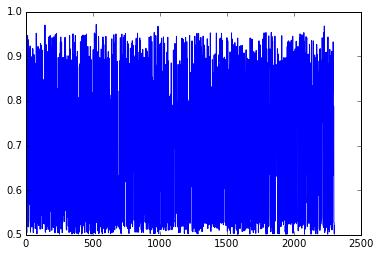

In [177]:
plot.plot(probability[:,0])